In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
file_path = 'music_dataset.csv'
df = pd.read_csv(file_path)

In [35]:
df.head()

Song             Artist    Streams  Daily Streams       Genre  \
0  Track 14728           EchoSync  689815326         796199        Trap   
1  Track 21319  The Midnight Howl  457954557        2426710  Electronic   
2  Track 22152    Retro Resonance  217316865        1639915      Reggae   
3  Track 80217     Urban Rhapsody  312747634        3614532         Pop   
4  Track 77204       Sofia Carter  726442597        1028518       Blues   

   Release Year  Peak Position  Weeks on Chart  Lyrics Sentiment  \
0          2021             81               8              0.20   
1          2018             44              99              0.51   
2          1992             57              12              0.36   
3          2000             21              50              0.89   
4          2001             97               9             -0.62   

   TikTok Virality  Danceability  Acousticness  Energy  
0               17          0.11          0.59    0.60  
1               30          0.61          0.25    0.71  
2               11          0.43          0.58    0.20  
3               44          0.18          0.04    0.63  
4               71          0.82          0.59    0.61

In [52]:
df.describe()

Streams  Daily Streams  Release Year  Weeks on Chart  \
count  4.850000e+03   4.850000e+03   4850.000000     4850.000000   
mean   3.970579e+08   2.493418e+06   2007.725773       52.280000   
std    2.307764e+08   1.457542e+06     10.341312       29.472456   
min    1.130883e+06   1.158000e+04   1990.000000        1.000000   
25%    1.982039e+08   1.209343e+06   1999.000000       27.000000   
50%    3.929179e+08   2.486103e+06   2008.000000       52.000000   
75%    5.978880e+08   3.781338e+06   2017.000000       78.000000   
max    7.999510e+08   4.999643e+06   2025.000000      103.000000   

       Lyrics Sentiment  TikTok Virality  Danceability  Acousticness  \
count       4850.000000      4850.000000   4850.000000   4850.000000   
mean           0.000478        50.776495      0.555280      0.501029   
std            0.574915        29.325179      0.260619      0.287531   
min           -1.000000         0.000000      0.100000      0.000000   
25%           -0.500000        26.000000      0.330000      0.250000   
50%            0.000000        51.000000      0.560000      0.500000   
75%            0.490000        76.000000      0.780000      0.750000   
max            1.000000       100.000000      1.000000      1.000000   

            Energy  Peak Position      Cluster  
count  4850.000000    4850.000000  4850.000000  
mean      0.553091      51.425773     0.995670  
std       0.260541      28.909270     0.813237  
min       0.100000       1.000000     0.000000  
25%       0.320000      27.000000     0.000000  
50%       0.550000      51.000000     1.000000  
75%       0.770000      76.000000     2.000000  
max       1.000000     100.000000     2.000000

In [53]:
df.describe(include=['O'])

Song      Artist  Genre
count          4850        4850   4850
unique         4747          20     22
top     Track 58512  Jay Zenith  Indie
freq              3         274    249

In [54]:
df.isnull().sum()

Song                0
Artist              0
Streams             0
Daily Streams       0
Genre               0
Release Year        0
Weeks on Chart      0
Lyrics Sentiment    0
TikTok Virality     0
Danceability        0
Acousticness        0
Energy              0
Peak Position       0
Cluster             0
dtype: int64

In [55]:
df.shape

(4850, 14)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4850 entries, 0 to 4849
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Song              4850 non-null   object 
 1   Artist            4850 non-null   object 
 2   Streams           4850 non-null   int64  
 3   Daily Streams     4850 non-null   int64  
 4   Genre             4850 non-null   object 
 5   Release Year      4850 non-null   int64  
 6   Weeks on Chart    4850 non-null   int64  
 7   Lyrics Sentiment  4850 non-null   float64
 8   TikTok Virality   4850 non-null   int64  
 9   Danceability      4850 non-null   float64
 10  Acousticness      4850 non-null   float64
 11  Energy            4850 non-null   float64
 12  Peak Position     4850 non-null   int64  
 13  Cluster           4850 non-null   int32  
dtypes: float64(4), int32(1), int64(6), object(3)
memory usage: 511.6+ KB


In [57]:
df.duplicated().sum()

np.int64(0)

In [36]:
col_to_move = 'Peak Position'  
df = df[[col for col in df.columns if col != col_to_move] + [col_to_move]]

In [37]:
df.head()

Song             Artist    Streams  Daily Streams       Genre  \
0  Track 14728           EchoSync  689815326         796199        Trap   
1  Track 21319  The Midnight Howl  457954557        2426710  Electronic   
2  Track 22152    Retro Resonance  217316865        1639915      Reggae   
3  Track 80217     Urban Rhapsody  312747634        3614532         Pop   
4  Track 77204       Sofia Carter  726442597        1028518       Blues   

   Release Year  Weeks on Chart  Lyrics Sentiment  TikTok Virality  \
0          2021               8              0.20               17   
1          2018              99              0.51               30   
2          1992              12              0.36               11   
3          2000              50              0.89               44   
4          2001               9             -0.62               71   

   Danceability  Acousticness  Energy  Peak Position  
0          0.11          0.59    0.60             81  
1          0.61          0.25    0.71             44  
2          0.43          0.58    0.20             57  
3          0.18          0.04    0.63             21  
4          0.82          0.59    0.61             97

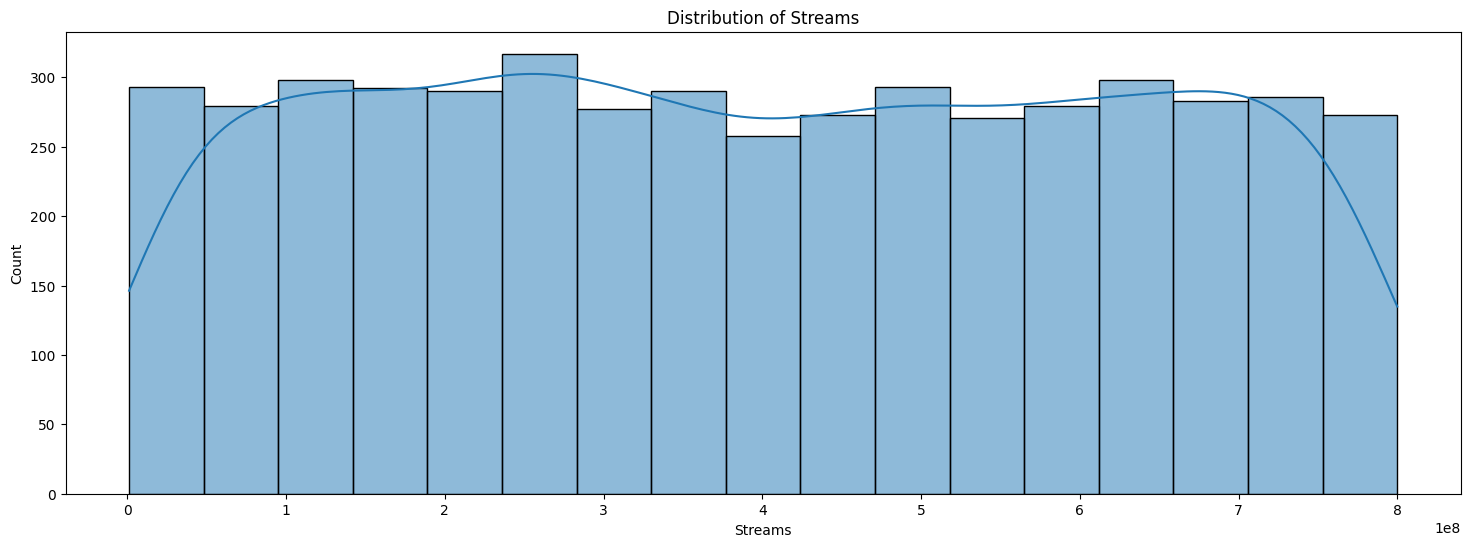

In [38]:
plt.figure(figsize=(18, 6))
sns.histplot(df['Streams'], kde=True)
plt.title('Distribution of Streams')
plt.show()

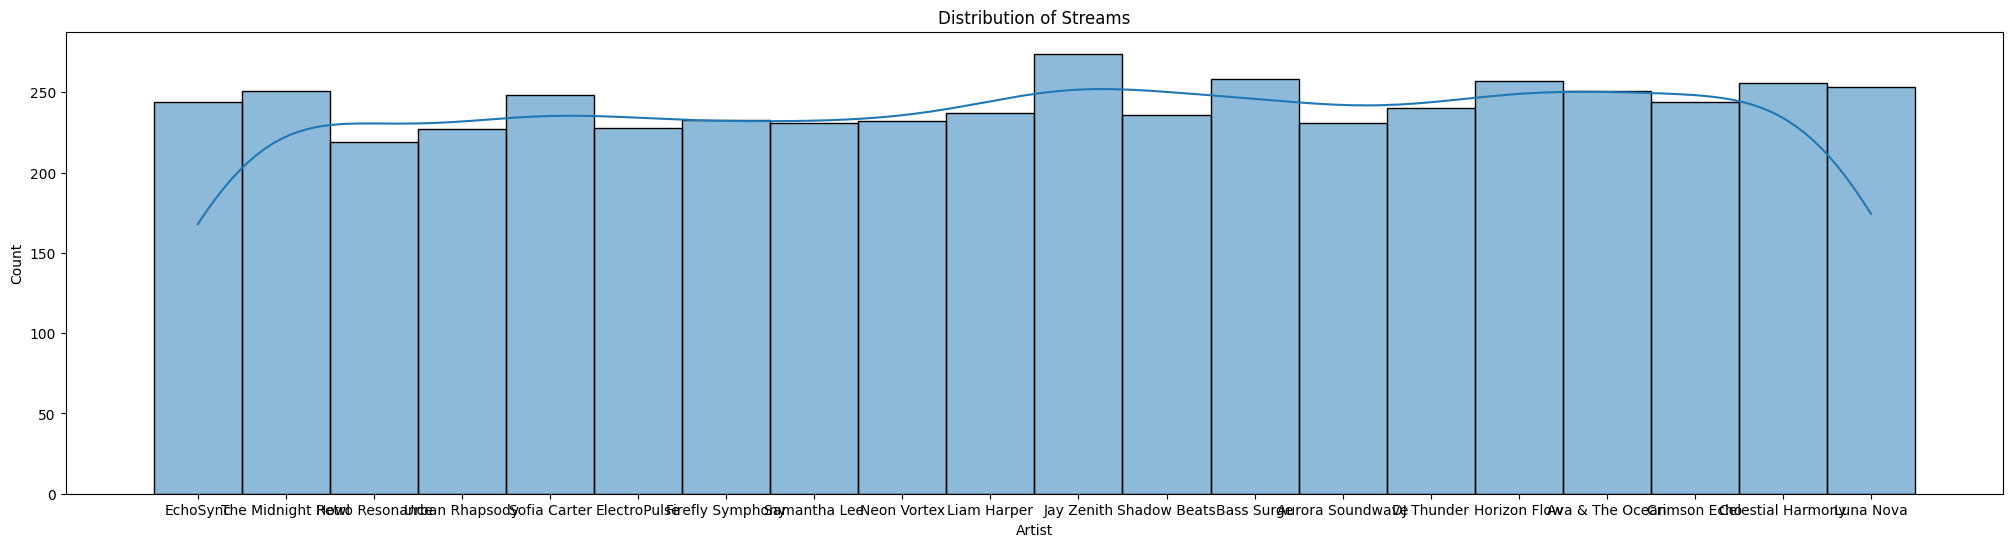

In [39]:
plt.figure(figsize=(25, 6))
sns.histplot(df['Artist'], kde=True)
plt.title('Distribution of Streams')
plt.show()

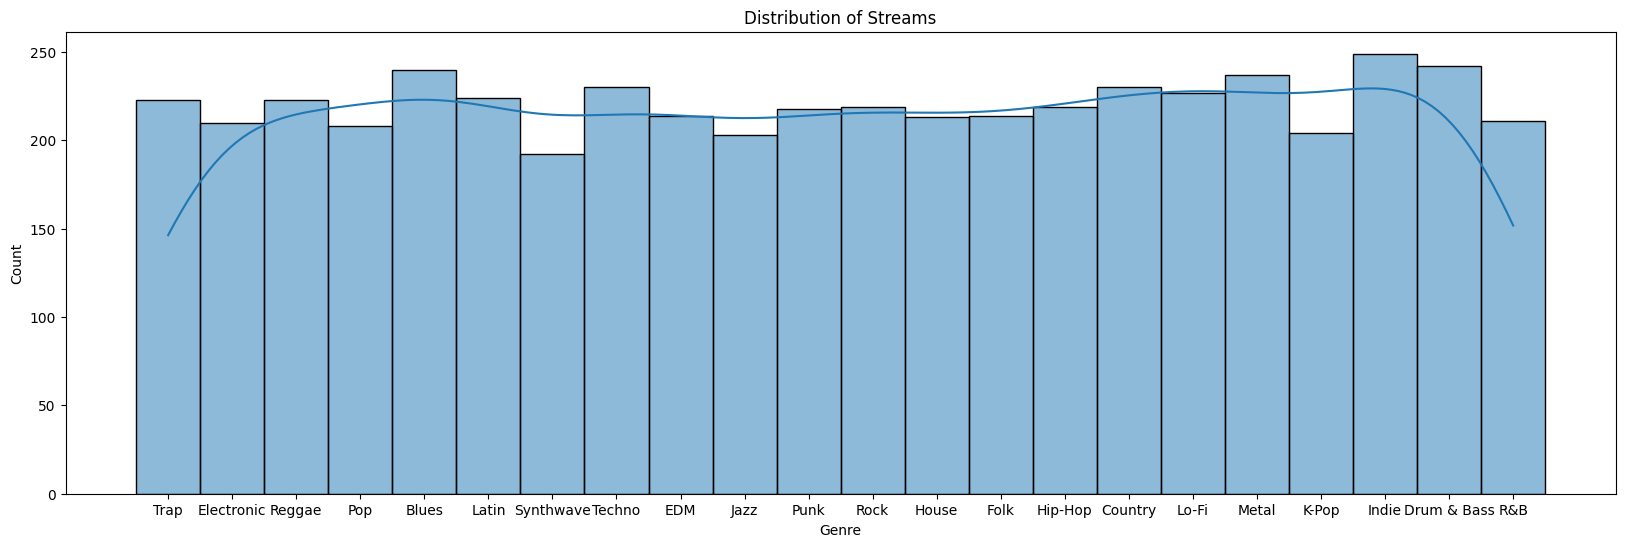

In [40]:
plt.figure(figsize=(20, 6))
sns.histplot(df['Genre'], kde=True)
plt.title('Distribution of Streams')
plt.show()

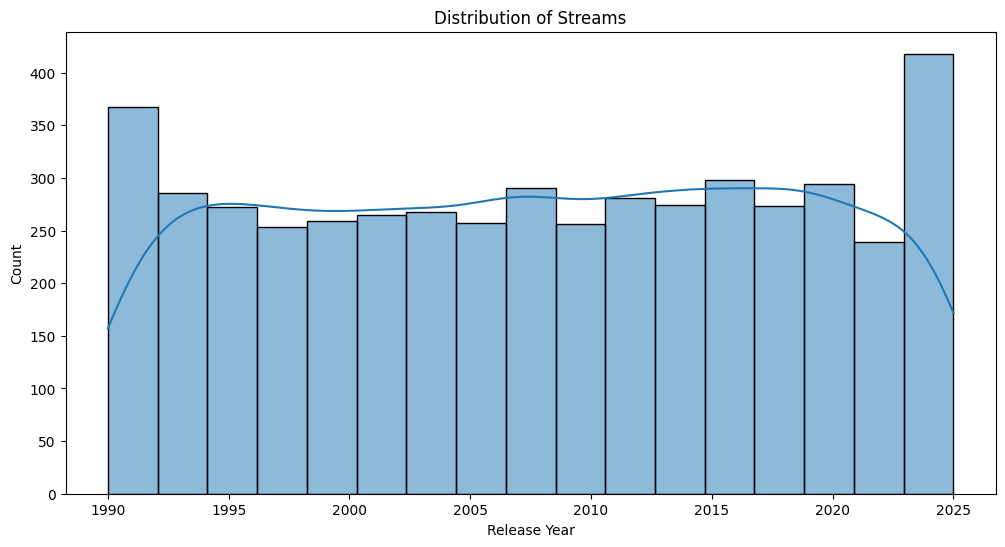

In [41]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Release Year'], kde=True)
plt.title('Distribution of Streams')
plt.show()

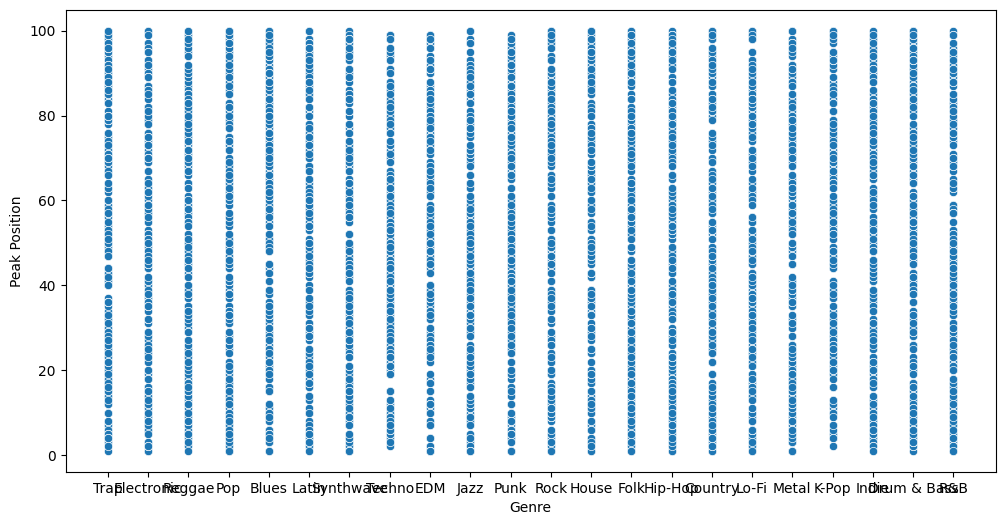

In [42]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Genre', y='Peak Position', data=df)
plt.title('')
plt.show()

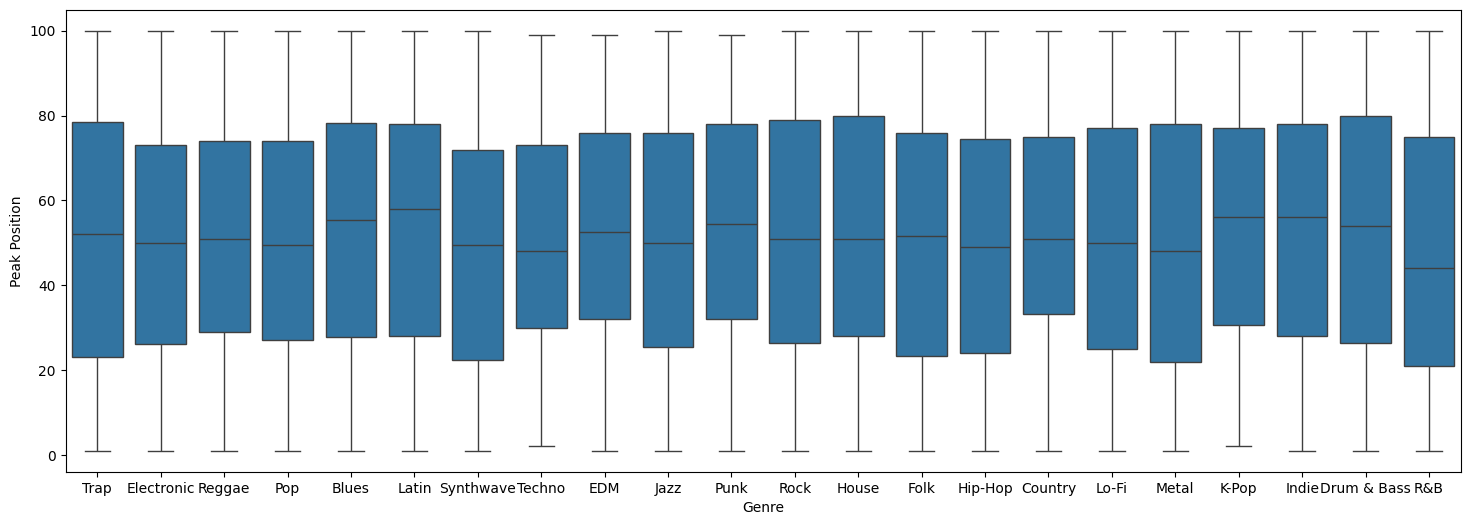

In [43]:
plt.figure(figsize=(18,6))
sns.boxplot(x='Genre', y='Peak Position', data=df)
plt.show()

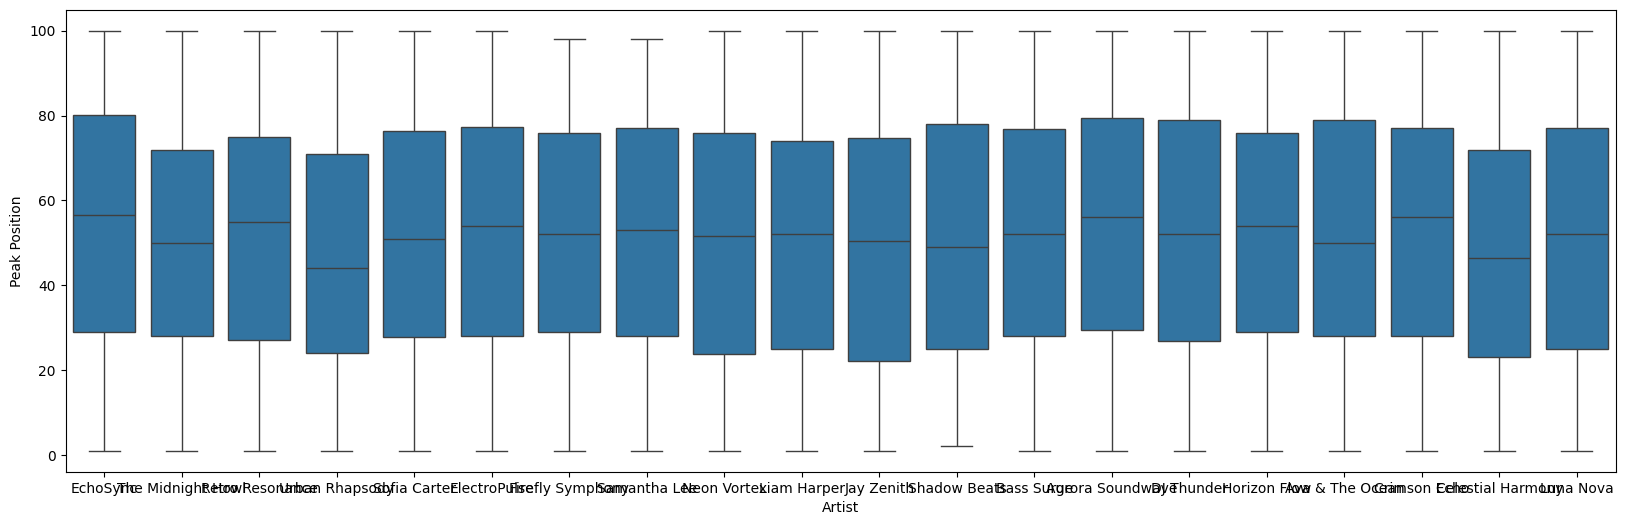

In [44]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Artist', y='Peak Position', data=df)
plt.show()


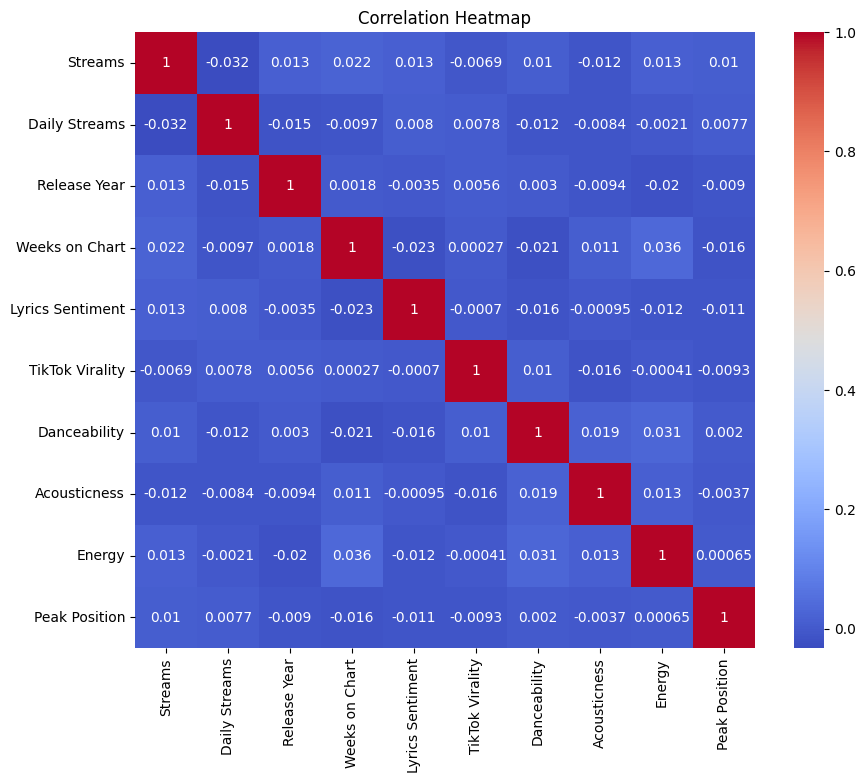

In [45]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [4]:
print("\nFeature Correlations:")
numeric_df = df.select_dtypes(include=[np.number])
print(numeric_df.corr()['Peak Position'].sort_values(ascending=False))


Feature Correlations:
Peak Position       1.000000
Streams             0.010348
Daily Streams       0.007745
Danceability        0.001985
Energy              0.000646
Acousticness       -0.003703
Release Year       -0.008976
TikTok Virality    -0.009317
Lyrics Sentiment   -0.010740
Weeks on Chart     -0.016119
Name: Peak Position, dtype: float64


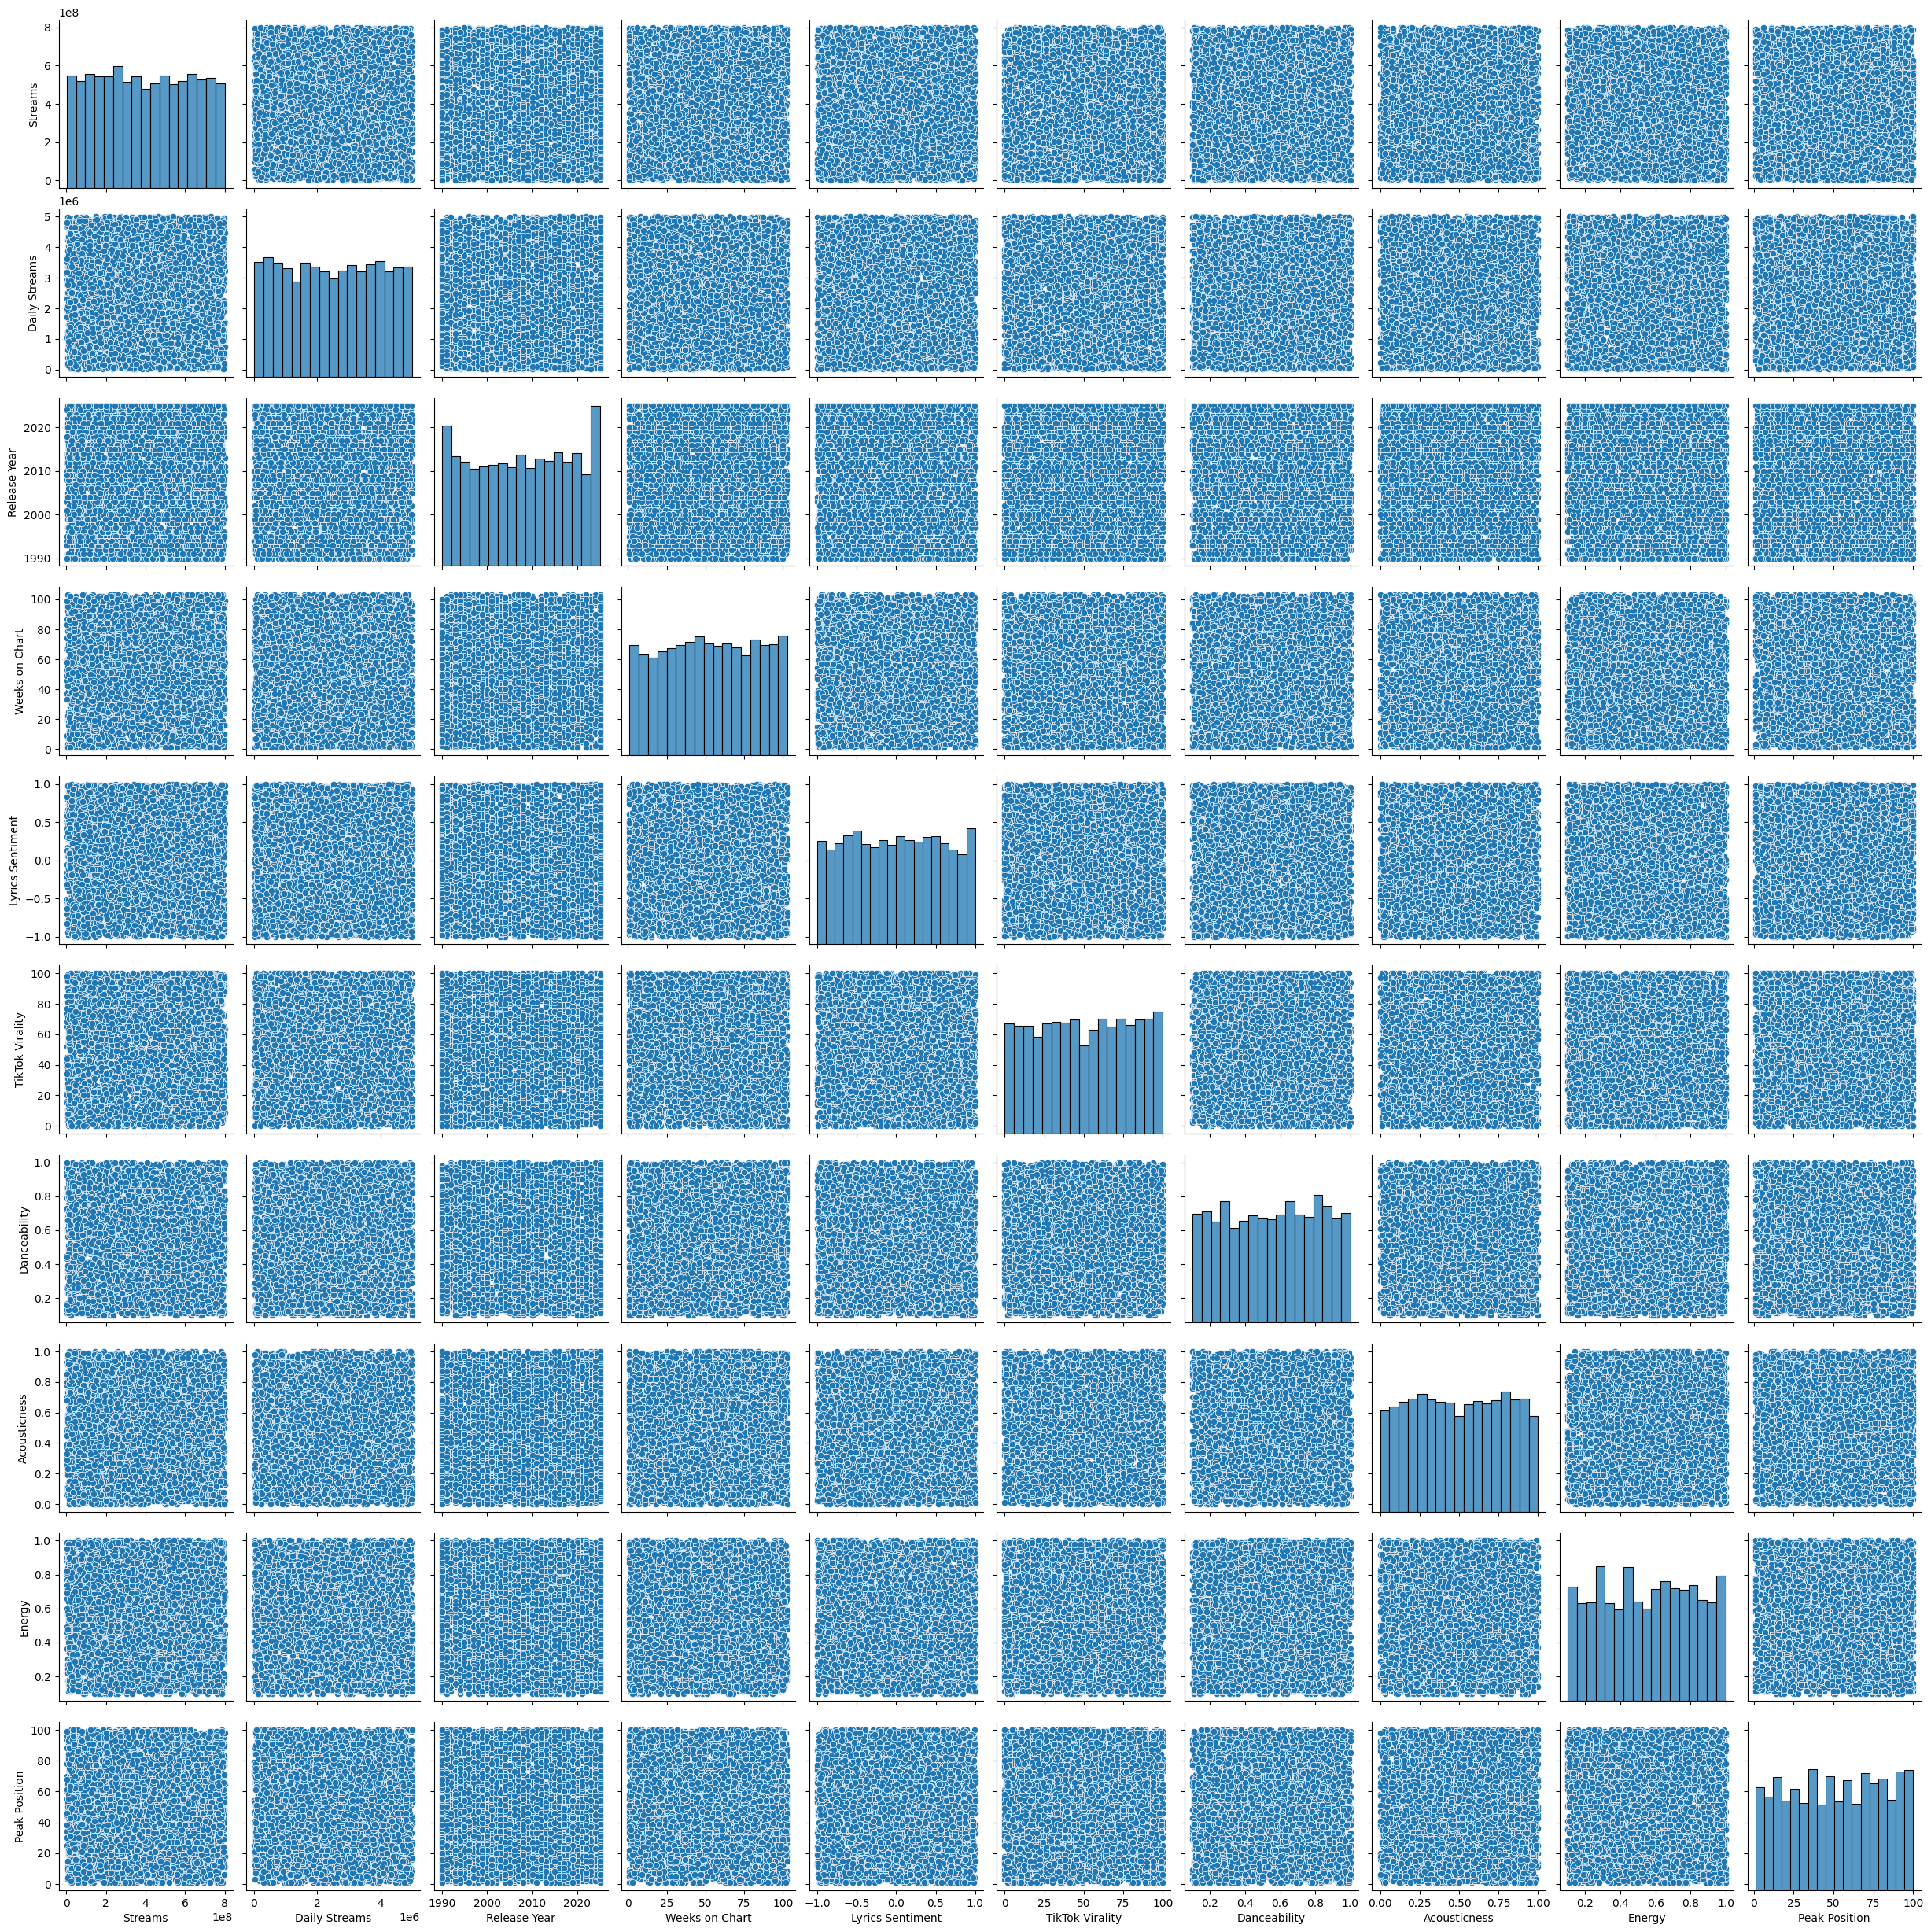

In [46]:
sns.pairplot(numeric_df)
plt.show()

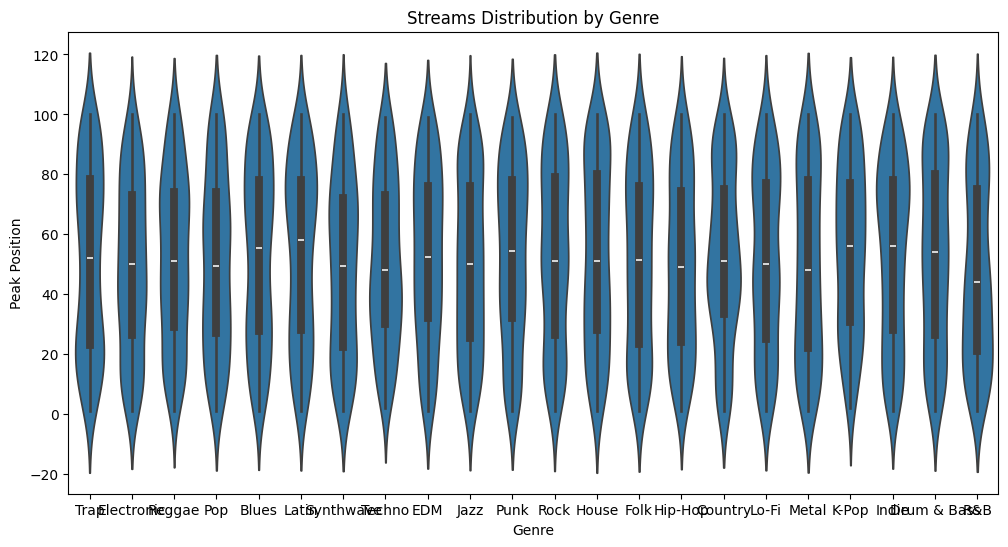

In [47]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Genre', y='Peak Position', data=df)
plt.title('Streams Distribution by Genre')
plt.show()

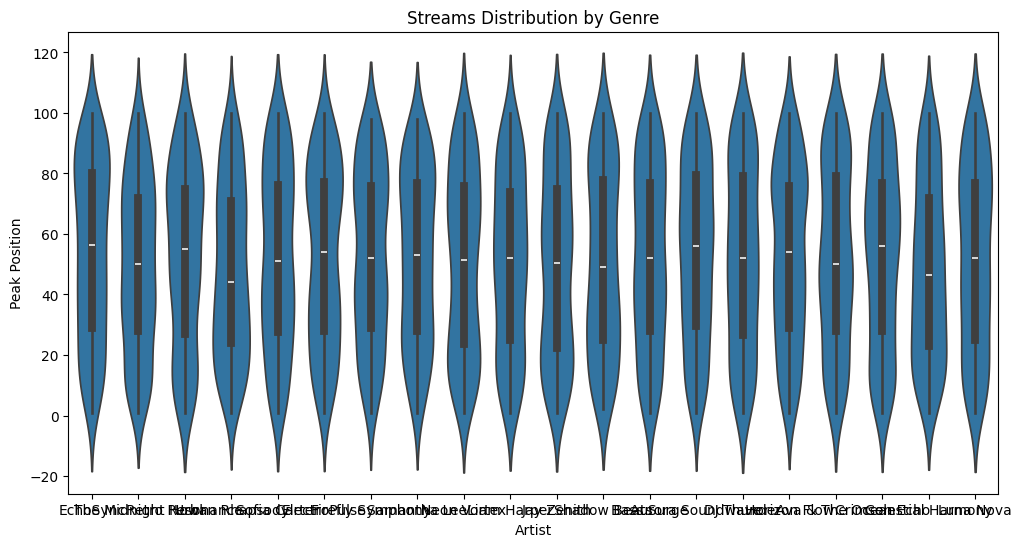

In [48]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Peak Position', data=df)
plt.title('Streams Distribution by Genre')
plt.show()

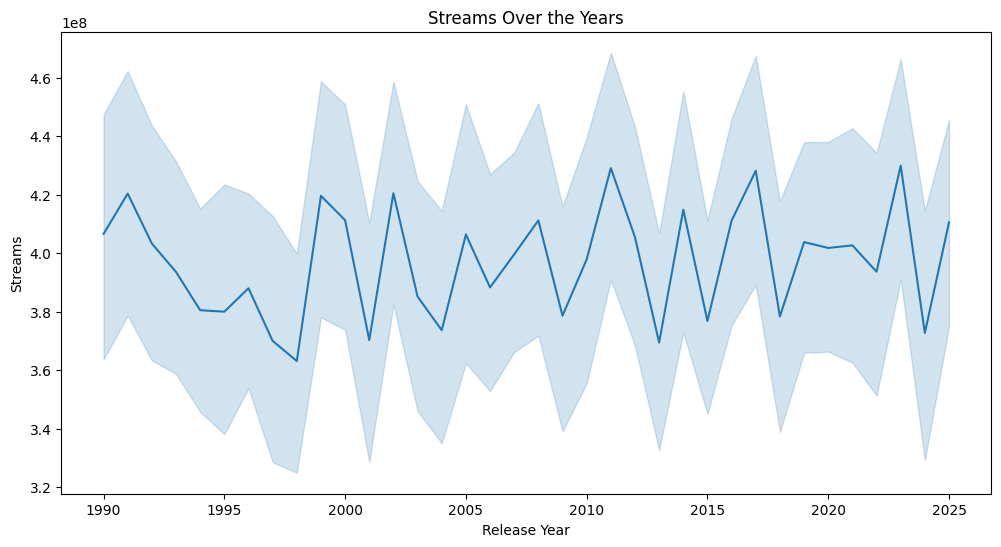

In [49]:
if 'Release Year' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Release Year', y='Streams', data=df)
    plt.title('Streams Over the Years')
    plt.show()

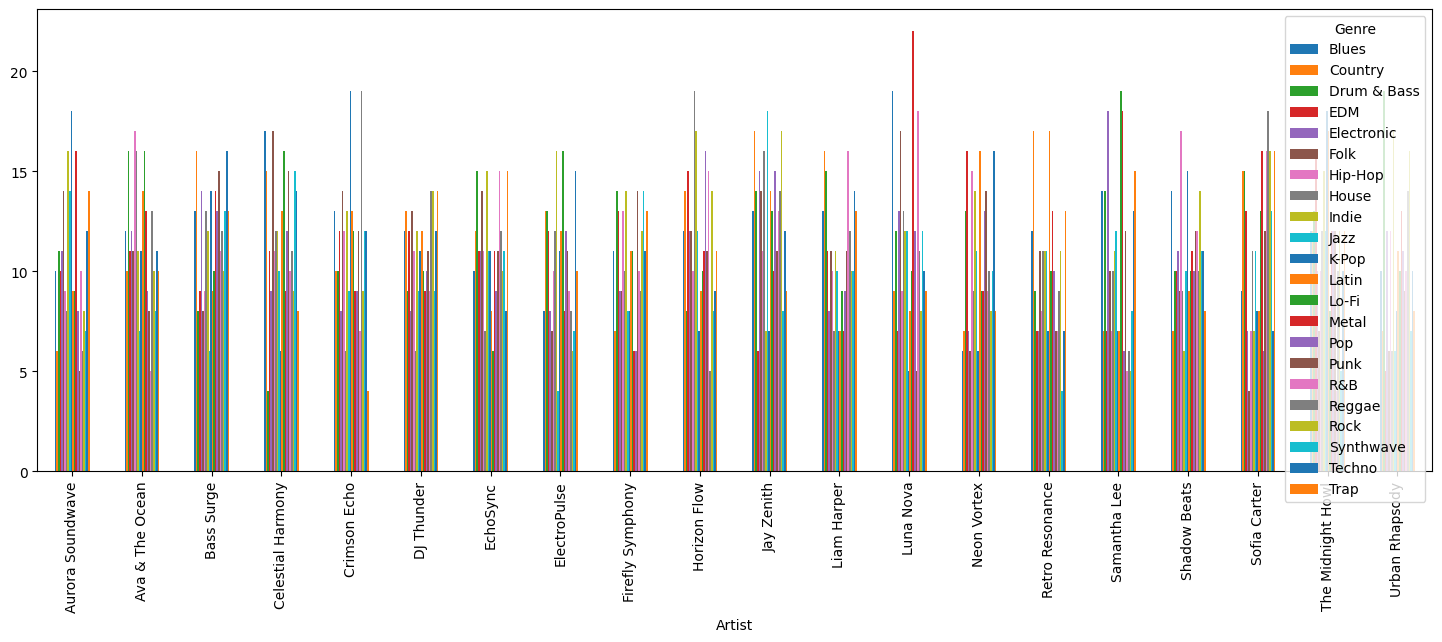

In [63]:

pd.crosstab(df['Artist'], df['Genre']).plot(kind='bar',figsize=(18, 6))
plt.show()


In [50]:
from scipy.stats import zscore
z_scores = np.abs(zscore(numeric_df))
outliers = np.where(z_scores > 3)
print(f"\nNumber of Outliers Detected: {len(outliers[0])}")


Number of Outliers Detected: 0


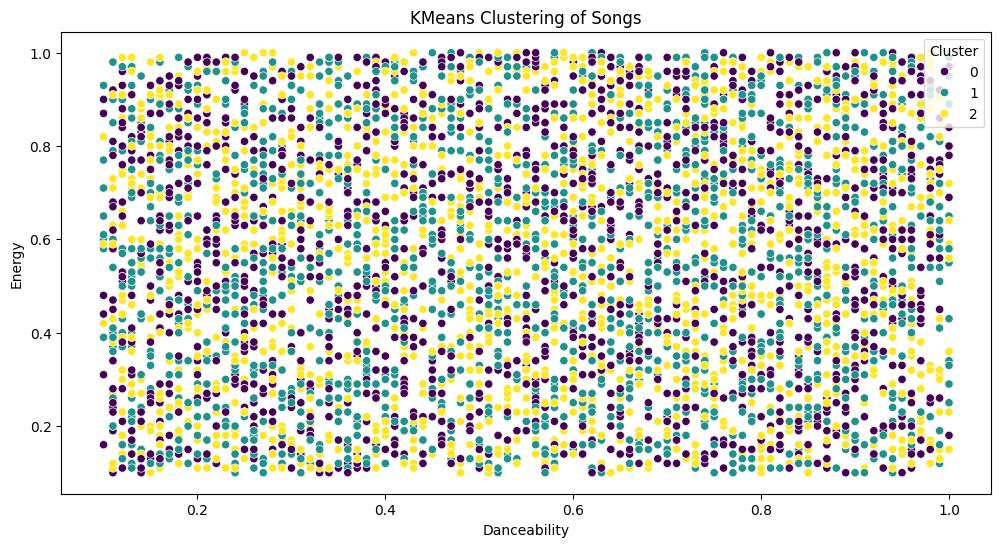


Final Encoded DataFrame Shape: (4850, 52)

Cluster Distribution:
Cluster
1    1643
0    1614
2    1593
Name: count, dtype: int64


In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(numeric_df)
df['Cluster'] = kmeans.labels_

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Danceability', y='Energy', hue='Cluster', palette='viridis', data=df)
plt.title('KMeans Clustering of Songs')
plt.show()
df_encoded = pd.get_dummies(df, columns=['Genre', 'Artist'], drop_first=True)
print("\nFinal Encoded DataFrame Shape:", df_encoded.shape)
print("\nCluster Distribution:")
print(df['Cluster'].value_counts())